In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np

In [2]:
# Reading the dataset
df = pd.read_csv('/kaggle/input/mumbai-house-prices/Mumbai House Prices.csv')

In [3]:
# Displaying the first few rows of the dataframe
df.head()

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


In [4]:
# Converting all prices to INR
def convert_price_to_inr(price, unit):
    if unit == 'L':
        return price * 1e5  # 1 Lakh = 100,000
    elif unit == 'Cr':
        return price * 1e7  # 1 Crore = 10,000,000
    else:
        return np.nan

In [5]:
# Apply the conversion function to the dataframe
df['price_in_inr'] = df.apply(lambda x: convert_price_to_inr(x['price'], x['price_unit']), axis=1)

In [6]:
# Drop the original price and price_unit columns
df.drop(columns=['price', 'price_unit'], inplace=True)

# Rename the new column to 'price'
df.rename(columns={'price_in_inr': 'price'}, inplace=True)

In [7]:
df.head()

,bhk,type,locality,area,region,status,age,price
0,3,Apartment,Lak And Hanware The Residency Tower,685,Andheri West,Ready to move,New,25000000.0
1,2,Apartment,Radheya Sai Enclave Building No 2,640,Naigaon East,Under Construction,New,5251000.0
2,2,Apartment,Romell Serene,610,Borivali West,Under Construction,New,17300000.0
3,2,Apartment,Soundlines Codename Urban Rainforest,876,Panvel,Under Construction,New,5998000.0
4,2,Apartment,Origin Oriana,659,Mira Road East,Under Construction,New,9411000.0


In [8]:
df.shape

(76038, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bhk       76038 non-null  int64  
 1   type      76038 non-null  object 
 2   locality  76038 non-null  object 
 3   area      76038 non-null  int64  
 4   region    76038 non-null  object 
 5   status    76038 non-null  object 
 6   age       76038 non-null  object 
 7   price     76038 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 4.6+ MB


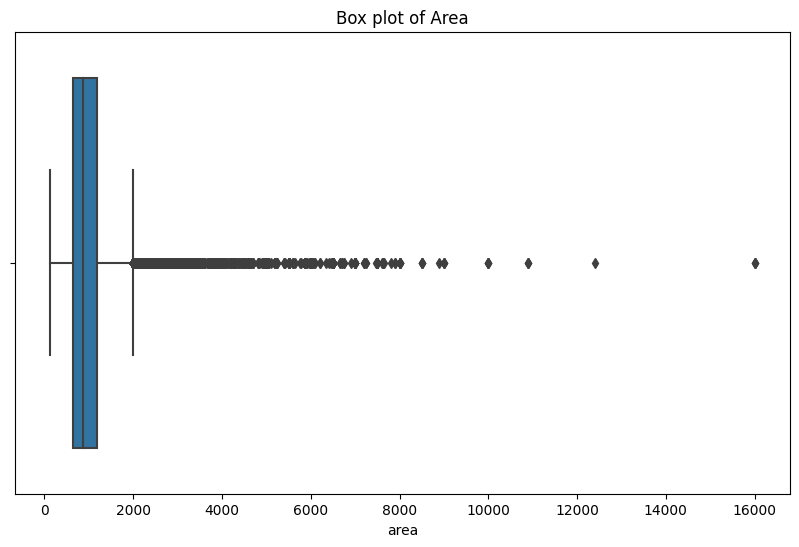

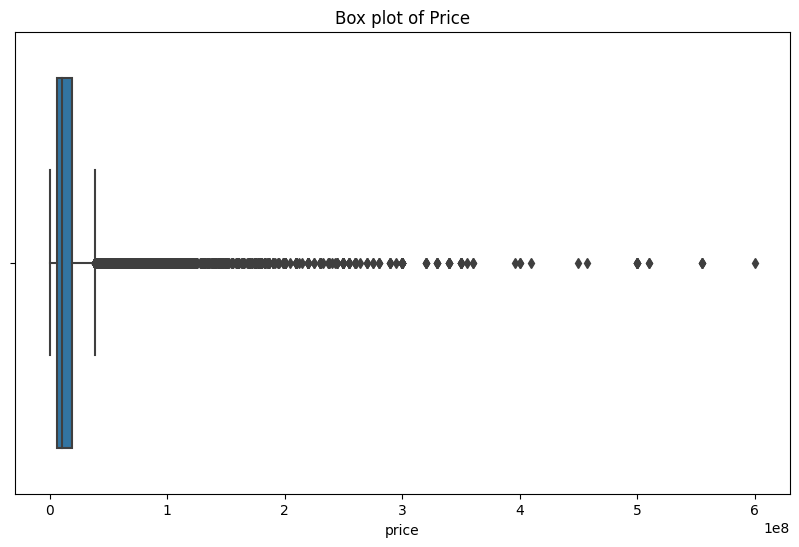

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the 'area' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['area'])
plt.title('Box plot of Area')
plt.show()

# Visualizing the 'price' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box plot of Price')
plt.show()

In [11]:
# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers from 'area' and 'price' columns
df_cleaned = remove_outliers(df, 'area')
df_cleaned = remove_outliers(df_cleaned, 'price')

# Displaying the shape of the dataframe after removing outliers
print(df_cleaned.shape)

# Displaying the first few rows of the cleaned dataframe
df_cleaned.head()

(67640, 8)


,bhk,type,locality,area,region,status,age,price
0,3,Apartment,Lak And Hanware The Residency Tower,685,Andheri West,Ready to move,New,25000000.0
1,2,Apartment,Radheya Sai Enclave Building No 2,640,Naigaon East,Under Construction,New,5251000.0
2,2,Apartment,Romell Serene,610,Borivali West,Under Construction,New,17300000.0
3,2,Apartment,Soundlines Codename Urban Rainforest,876,Panvel,Under Construction,New,5998000.0
4,2,Apartment,Origin Oriana,659,Mira Road East,Under Construction,New,9411000.0


In [12]:
from scipy import stats

# Calculate Z-score for 'area' and 'price'
df_cleaned['area_zscore'] = np.abs(stats.zscore(df_cleaned['area']))
df_cleaned['price_zscore'] = np.abs(stats.zscore(df_cleaned['price']))

# Define threshold for Z-score (commonly 3)
threshold = 3

# Filter rows based on Z-score and create a copy of the filtered DataFrame
df2 = df_cleaned[(df_cleaned['area_zscore'] < threshold) & (df_cleaned['price_zscore'] < threshold)].copy()

# Drop the Z-score columns from the copied DataFrame
df2.drop(columns=['area_zscore', 'price_zscore'], inplace=True)

# Resetting index after dropping rows
df2.reset_index(drop=True, inplace=True)

In [13]:
# Displaying the shape of df2
print("Shape of df2 after Z-score cleaning:", df2.shape)

# Displaying the first few rows of df2
df2.head()

Shape of df2 after Z-score cleaning: (67142, 8)


,bhk,type,locality,area,region,status,age,price
0,3,Apartment,Lak And Hanware The Residency Tower,685,Andheri West,Ready to move,New,25000000.0
1,2,Apartment,Radheya Sai Enclave Building No 2,640,Naigaon East,Under Construction,New,5251000.0
2,2,Apartment,Romell Serene,610,Borivali West,Under Construction,New,17300000.0
3,2,Apartment,Soundlines Codename Urban Rainforest,876,Panvel,Under Construction,New,5998000.0
4,2,Apartment,Origin Oriana,659,Mira Road East,Under Construction,New,9411000.0


In [14]:
df2.describe()

,bhk,area,price
count,67142.000000,67142.000000,6.714200e+04
mean,1.814364,860.989768,1.158956e+07
std,0.724314,334.912686,7.248340e+06
min,1.000000,127.000000,4.490000e+05
25%,1.000000,617.000000,6.000000e+06
50%,2.000000,782.000000,9.600000e+06
75%,2.000000,1065.000000,1.600000e+07
max,5.000000,1896.000000,3.380000e+07


In [15]:
# List of categorical variables
categorical_vars = ['locality', 'region', 'status', 'age']

# Print unique values and their counts
for var in categorical_vars:
    print(f"Unique values and counts for {var}:")
    print(df2[var].value_counts())
    print()

Unique values and counts for locality:
locality
Hiranandani Meadows                    545
Runwal Gardens                         389
JP North Barcelona                     360
Cosmos Horizon                         334
ACME Ozone Phase 2                     312
                                      ... 
Reputed Builder Shivam Apartments        1
Suma Sam CHSL Suma Sam CHSL              1
Reputed Builder Eden Garden              1
Reputed Builder Bethania Apartments      1
Ravi Gaurav Residency Villa              1
Name: count, Length: 8993, dtype: int64

Unique values and counts for region:
region
Thane West             11776
Mira Road East          9866
Dombivali               3010
Kandivali East          2406
Kharghar                2199
                       ...  
Pestom Sagar Colony        1
Sector 8 New panvel        1
Khanda Colony              1
vile parle west            1
Sector-3 Ulwe              1
Name: count, Length: 214, dtype: int64

Unique values and counts for status

In [16]:
# Define a function to group less frequent values into 'Other'
def group_low_count_categories(series, threshold):
    counts = series.value_counts()
    mask = series.isin(counts[counts >= threshold].index)
    series = series.mask(~mask, 'Other')  # Use mask() to assign 'Other' to less frequent values
    return series

# Group less frequent localities and regions into 'Other'
df2['locality'] = group_low_count_categories(df2['locality'], threshold=50)  # Adjust threshold as needed
df2['region'] = group_low_count_categories(df2['region'], threshold=100)    # Adjust threshold as needed

# Print updated unique values and counts for locality and region
print("Updated unique values and counts for locality after grouping:")
print(df2['locality'].value_counts())
print()

print("Updated unique values and counts for region after grouping:")
print(df2['region'].value_counts())

Updated unique values and counts for locality after grouping:
locality
Other                                      44583
Hiranandani Meadows                          545
Runwal Gardens                               389
JP North Barcelona                           360
Cosmos Horizon                               334
                                           ...  
Godrej Emerald                                50
Chaitanya The Greens Radhakunj                50
Bachraj Landmark                              50
Lodha Amara Tower 45                          50
Hubtown The Premiere Residences Beverly       50
Name: count, Length: 217, dtype: int64

Updated unique values and counts for region after grouping:
region
Thane West        11776
Mira Road East     9866
Dombivali          3010
Kandivali East     2406
Kharghar           2199
                  ...  
Bandra East         133
Nerul               124
Bhandup East        116
Titwala             112
Bhayandar West      105
Name: count, Length

In [17]:
import json
# Function to save DataFrame columns as JSON
def save_columns_as_json(df, columns, filename):
    for col in columns:
        unique_values = df[col].unique().tolist()
        with open(f'{filename}_{col}.json', 'w') as f:
            json.dump(unique_values, f)

# Example usage: Save 'type', 'status', 'age', 'locality', 'region' columns as JSON
save_columns_as_json(df, ['type', 'status', 'age', 'locality', 'region'], 'unique_values')

print("JSON files saved successfully.")

JSON files saved successfully.


In [18]:
# Compute mean price for each locality and region
locality_means = df2.groupby('locality')['price'].mean()
region_means = df2.groupby('region')['price'].mean()

# Map mean prices back to the dataframe
df2['locality_target_encoded'] = df2['locality'].map(locality_means)
df2['region_target_encoded'] = df2['region'].map(region_means)

# Print head to verify
df2[['locality_target_encoded', 'region_target_encoded']].head()

,locality_target_encoded,region_target_encoded
0,1.165268e+07,1.690715e+07
1,1.165268e+07,3.839120e+06
2,1.165268e+07,1.802550e+07
3,1.165268e+07,8.034569e+06
4,1.165268e+07,8.083087e+06


In [19]:
import joblib
import pickle

# Extract unique values and their encoded values into dictionaries
locality_encoding_map = dict(zip(df2['locality'], df2['locality_target_encoded']))
region_encoding_map = dict(zip(df2['region'], df2['region_target_encoded']))
# Save locality encoding map to file
with open('locality_encoding_map.pkl', 'wb') as f:
    pickle.dump(locality_encoding_map, f)

# Save region encoding map to file
with open('region_encoding_map.pkl', 'wb') as f:
    pickle.dump(region_encoding_map, f)

In [20]:
# Drop original locality and region columns if desired
df2.drop(['locality', 'region'], axis=1, inplace=True)

In [21]:
# Perform one-hot encoding for status and age
df2 = pd.get_dummies(df2, columns=['type','status', 'age'], drop_first=True, dtype=int)

# Print head to verify
df2.head()

,bhk,area,price,locality_target_encoded,region_target_encoded,type_Independent House,type_Penthouse,type_Studio Apartment,type_Villa,status_Under Construction,age_Resale,age_Unknown
0,3,685,25000000.0,1.165268e+07,1.690715e+07,0,0,0,0,0,0,0
1,2,640,5251000.0,1.165268e+07,3.839120e+06,0,0,0,0,1,0,0
2,2,610,17300000.0,1.165268e+07,1.802550e+07,0,0,0,0,1,0,0
3,2,876,5998000.0,1.165268e+07,8.034569e+06,0,0,0,0,1,0,0
4,2,659,9411000.0,1.165268e+07,8.083087e+06,0,0,0,0,1,0,0


In [22]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Scale numerical features in df2 (assuming 'bhk', 'area', and possibly 'price' are numerical)
df2_scaled = df2.copy()  # Make a copy to preserve original data
df2_scaled[['bhk', 'area']] = scaler.fit_transform(df2_scaled[['bhk', 'area']])

joblib.dump(scaler, 'min_max_scaler.pkl')

['min_max_scaler.pkl']

In [23]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df2_scaled.drop('price', axis=1)
y = df2_scaled['price']

# Split data into training and testing sets (adjust test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression


# Define models and their parameter grids
models = {
    'Linear Regression': (LinearRegression(), {
        'fit_intercept': [True, False],
        'copy_X': [True, False]
    }),
    'Ridge Regression': (Ridge(), {
        'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']
    }),
    'Lasso Regression': (Lasso(), {
        'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
        'max_iter': [1000, 5000, 10000]
    }),
    'DecisionTree Regressor': (DecisionTreeRegressor(), {
        'max_depth': [None, 10, 20, 30, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5, 10]
    })
}

# Track the best model and its score
best_model = None
best_score = -float('inf')
best_model_name = None

# Perform GridSearchCV for each model
for name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=3, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {name}: {grid_search.best_score_:.4f}")
    print()

    # Evaluate on test set using the R^2 score
    test_score = grid_search.best_estimator_.score(X_test, y_test)
    print(f"Test set score (R^2) for {name}: {test_score:.4f}")
    print()

    # Check if this model is the best so far
    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_model = grid_search.best_estimator_
        best_model_name = name
        


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters for Linear Regression: {'copy_X': True, 'fit_intercept': True}
Best cross-validation score for Linear Regression: 0.7595

Test set score (R^2) for Linear Regression: 0.7581

Fitting 3 folds for each of 25 candidates, totalling 75 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.01585e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.02773e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.95415e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.01585e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

Best parameters for Ridge Regression: {'alpha': 1.0, 'solver': 'auto'}
Best cross-validation score for Ridge Regression: 0.7595

Test set score (R^2) for Ridge Regression: 0.7581

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best parameters for Lasso Regression: {'alpha': 100.0, 'max_iter': 1000}
Best cross-validation score for Lasso Regression: 0.7595

Test set score (R^2) for Lasso Regression: 0.7581

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Best parameters for DecisionTree Regressor: {'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 5}
Best cross-validation score for DecisionTree Regressor: 0.8565

Test set score (R^2) for DecisionTree Regressor: 0.8611



In [25]:
# Save the best model using joblib
if best_model is not None:
    filename = f"{best_model_name.lower().replace(' ', '_')}_regression_model.pkl"
    joblib.dump(best_model, filename)
    print(f"Saved {best_model_name} model as {filename}")
else:
    print("No best model found.")

Saved DecisionTree Regressor model as decisiontree_regressor_regression_model.pkl
